
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [2]:
#
# Import relevant Libraries
#

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [3]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.

(x_train, y_train ),(x_test, y_test) = mnist.load_data()

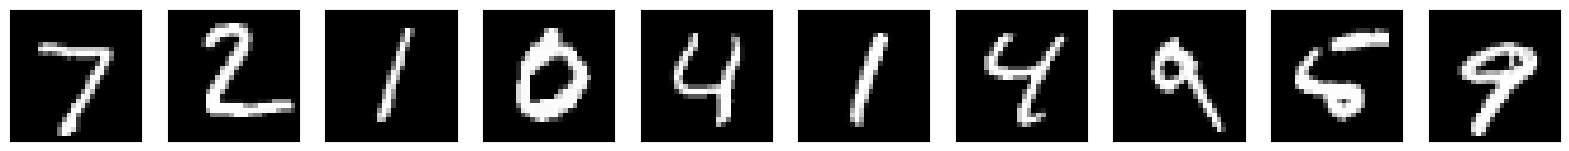

In [4]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [4]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255

x_train = x_train / 255
x_test = x_test / 255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [6]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
#
#
encoder.add(Dense(588, activation="relu"))
encoder.add(Dense(392, activation="relu"))
encoder.add(Dense(196, activation="relu"))
encoder.add(Dense(98, activation="relu"))

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [7]:
# print the encoder model
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 588)               461580    
                                                                 
 dense_1 (Dense)             (None, 392)               230888    
                                                                 
 dense_2 (Dense)             (None, 196)               77028     
                                                                 
 dense_3 (Dense)             (None, 98)                19306     
                                                                 
 dense_4 (Dense)             (None, 50)                4950      
                                                                 
 dense_5 (Dense)             (None, 25)                1

In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#
#decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(98, activation="relu"))
decoder.add(Dense(196, activation="relu"))
decoder.add(Dense(392, activation="relu"))
decoder.add(Dense(588, activation="relu"))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [9]:
# print the decoder model
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1300      
                                                                 
 dense_7 (Dense)             (None, 98)                4998      
                                                                 
 dense_8 (Dense)             (None, 196)               19404     
                                                                 
 dense_9 (Dense)             (None, 392)               77224     
                                                                 
 dense_10 (Dense)            (None, 588)               231084    
                                                                 
 dense_11 (Dense)            (None, 784)               461776    
                                                                 
 reshape (Reshape)           (None, 28, 28)           

In [10]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [11]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                795027    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            795786    
                                                                 
Total params: 1590813 (6.07 MB)
Trainable params: 1590813 (6.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
early_stopper = EarlyStopping(monitor="val_loss", patience=5)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
history = autoencoder.fit(x=x_train, y=x_train, validation_data=(x_test,x_test), callbacks=[early_stopper], verbose=1, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 58s 28ms/step - loss: 0.1814 - accuracy: 0.1708 - val_loss: 0.1490 - val_accuracy: 0.2053
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1429 - accuracy: 0.2183 - val_loss: 0.1364 - val_accuracy: 0.2233
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1320 - accuracy: 0.2326 - val_loss: 0.1266 - val_accuracy: 0.2367
Epoch 4/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1241 - accuracy: 0.2441 - val_loss: 0.1211 - val_accuracy: 0.2479
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1203 - accuracy: 0.2501 - val_loss: 0.1185 - val_accuracy: 0.2506
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1179 - accuracy: 0.2546 - val_loss: 0.1179 - val_accuracy: 0.2526
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1162 - accuracy: 0.2590 - val_loss: 0.1167

313/313 [==============================] - 2s 5ms/step


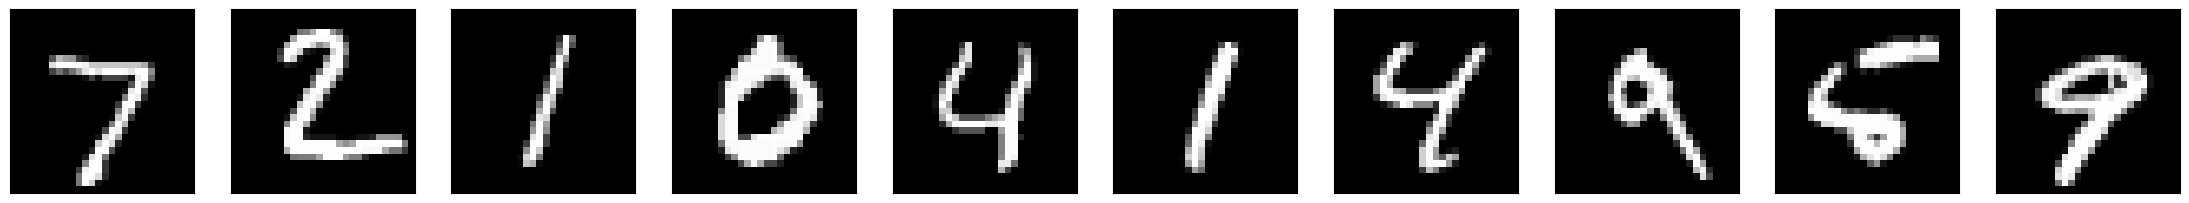

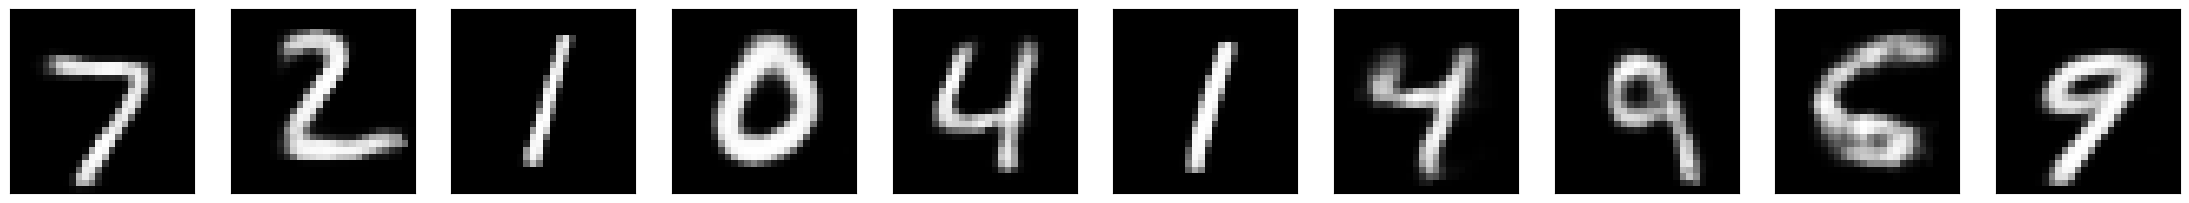

In [22]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(28, 28))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
plt.show()

plt.figure(figsize=(28, 28))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [5]:
from tensorflow.keras.layers import GaussianNoise

In [6]:
sample = GaussianNoise(0.2)
noisey_test = sample(x_test[0:],training=True)
noisey_train = sample(x_train[0:],training=True)

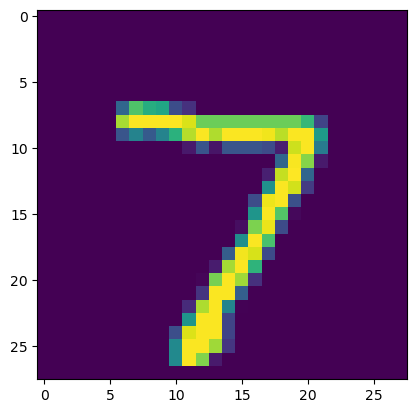

In [7]:
plt.imshow(x_test[0])

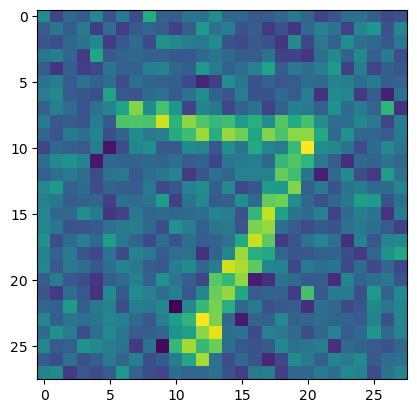

In [9]:
plt.imshow(noisey_test[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [10]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#
#

encoder.add(Dense(588, activation="relu"))
encoder.add(Dense(392, activation="relu"))
encoder.add(Dense(196, activation="relu"))
encoder.add(Dense(98, activation="relu"))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [11]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#

decoder.add(Dense(98, activation="relu"))
decoder.add(Dense(196, activation="relu"))
decoder.add(Dense(392, activation="relu"))
decoder.add(Dense(588, activation="relu"))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [12]:
noise_remover = Sequential([encoder, decoder])

In [13]:
# Compile the network as earlier
early_stopper = EarlyStopping(monitor="val_loss", patience=3)
noise_remover.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Fit the network as earlier.
history = noise_remover.fit(x=noisey_train, y=x_train, validation_data=(noisey_test,x_test),callbacks=[early_stopper], verbose=1, epochs=60)

Epoch 1/60


1875/1875 [==============================] - 50s 18ms/step - loss: 0.1865 - accuracy: 0.1701 - val_loss: 0.1509 - val_accuracy: 0.2117
Epoch 2/60
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1459 - accuracy: 0.2191 - val_loss: 0.1391 - val_accuracy: 0.2231
Epoch 3/60
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1377 - accuracy: 0.2311 - val_loss: 0.1331 - val_accuracy: 0.2332
Epoch 4/60
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1320 - accuracy: 0.2381 - val_loss: 0.1276 - val_accuracy: 0.2377
Epoch 5/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1275 - accuracy: 0.2441 - val_loss: 0.1239 - val_accuracy: 0.2494
Epoch 6/60
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1246 - accuracy: 0.2492 - val_loss: 0.1229 - val_accuracy: 0.2468
Epoch 7/60
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1226 - accuracy: 0.2512 - val_loss: 0.1203

In [48]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


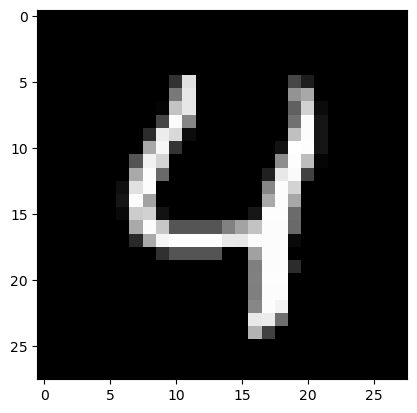

The Noisey Version


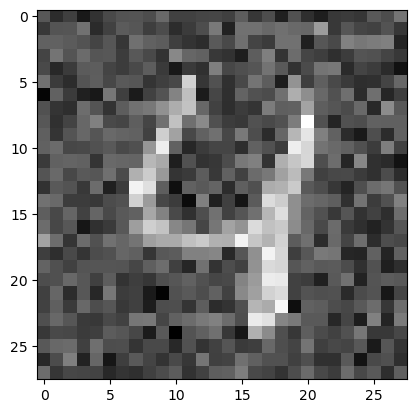

After going through denoiser


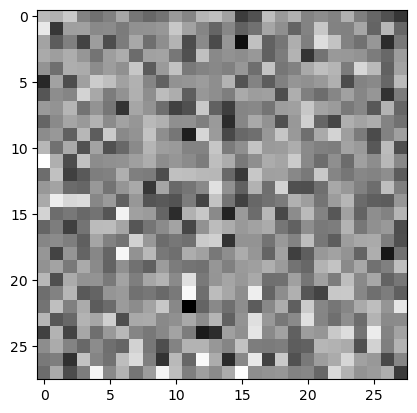

In [49]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.